## Анализ полученных данных

Статистика по вакансиям для удобного отображения вынесена в отдельную тетрадку.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set()

### Загрузка данных

In [2]:
df = pd.read_csv('../../hh_results.csv')
df[df['Salary']][0:7]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
0,39912622,Знаменка Капитал,Data Scientist / Quantitative Researcher,True,217500.0,NaN,От 3 до 6 лет,Полный день,"['Mathematical Statistics', 'Mathematical Prog...",Обязанности: Разработка и оценка статистическ...
1,40114134,NZT Group,Data Scientist,True,150000.0,300000.0,От 1 года до 3 лет,Полный день,"['Python', 'Data Mining', 'Математическая стат...",Наша компания занимается разработкой своих вну...
2,40005967,Адаперио,ML Engineer / Data Scientist,True,200000.0,NaN,От 1 года до 3 лет,Полный день,"['Анализ данных', 'Статистический анализ', 'Ра...",Адаперио - компания разработчик комплексного р...
3,40086655,"Эверис, Представительство",Data Scientist,True,150000.0,230000.0,От 3 до 6 лет,Полный день,"['R', 'Python', 'SQL']","В подразделение французской компании, специали..."
4,39964742,retailCRM,Senior Data Scientist,True,174000.0,261000.0,От 3 до 6 лет,Удаленная работа,"['Python', 'Data Science']",RetailCRM — это крупнейшая CRM для омниканальн...
7,38576646,РАБЛЗ,Data Scientist (middle or senior),True,NaN,435000.0,От 3 до 6 лет,Гибкий график,"['Python', 'Data Mining', 'SQL', 'Математическ...",Наша компания разрабатывает аналитические реше...
10,39602668,Артистраж,Data Scientist,True,104400.0,147900.0,От 1 года до 3 лет,Полный день,"['Python', 'R', 'Machine Learning', 'Computer ...",Обязанности: Обработка и аналитика входных да...


### Количество вакансий

In [3]:
print('Number of vacancies: {}'.format(df['Ids'].count()))

Number of vacancies: 236


### Вакансия с максимальной зарплатой

In [4]:
df.iloc[df[['From', 'To']].idxmax()]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
223,39835664,Hunt For You,"Senior Fullstack Developer (Python, remote)",True,316405.0,553709.0,Более 6 лет,Удаленная работа,"['Python', 'PostgreSQL', 'SQL', 'JavaScript', ...",О нас: Американская компания с русскоговоряще...
223,39835664,Hunt For You,"Senior Fullstack Developer (Python, remote)",True,316405.0,553709.0,Более 6 лет,Удаленная работа,"['Python', 'PostgreSQL', 'SQL', 'JavaScript', ...",О нас: Американская компания с русскоговоряще...


### Вакансия с минимальной зарплатой

In [5]:
df.iloc[df[['From', 'To']].idxmin()]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
138,39755183,Платформа НТИ,Data scientist,True,100000.0,150000.0,Нет опыта,Полный день,"['Анализ данных', 'Python', 'Веб-аналитика', '...","Платформа НТИ — некоммерческая организация, со..."
234,39585034,Раксел Телематикс,Андроид Разработчик (Android Developer),True,110000.0,130000.0,От 3 до 6 лет,Удаленная работа,"['Java', 'Android', 'Kotlin', 'DI', 'Room', 'R...",Международная технологическая компания Раксел ...


### Статистика по зарплатам

Здесь отображается количество вакансий с указанными зарплатами "От" и "До", производится подсчет таких вакансий, а также некоторые свойства: среднее, медиана, минимальное и максимальное значение.

In [6]:
df_stat = df[['From', 'To']].describe().applymap(np.int32)
df_stat.iloc[list(range(4))+[-1]]

,From,To
count,19,17
mean,185859,295746
std,65462,122663
min,100000,130000
max,316405,553709


### График зарплат

Приводятся графики и распределения зарплат "От" и "До"

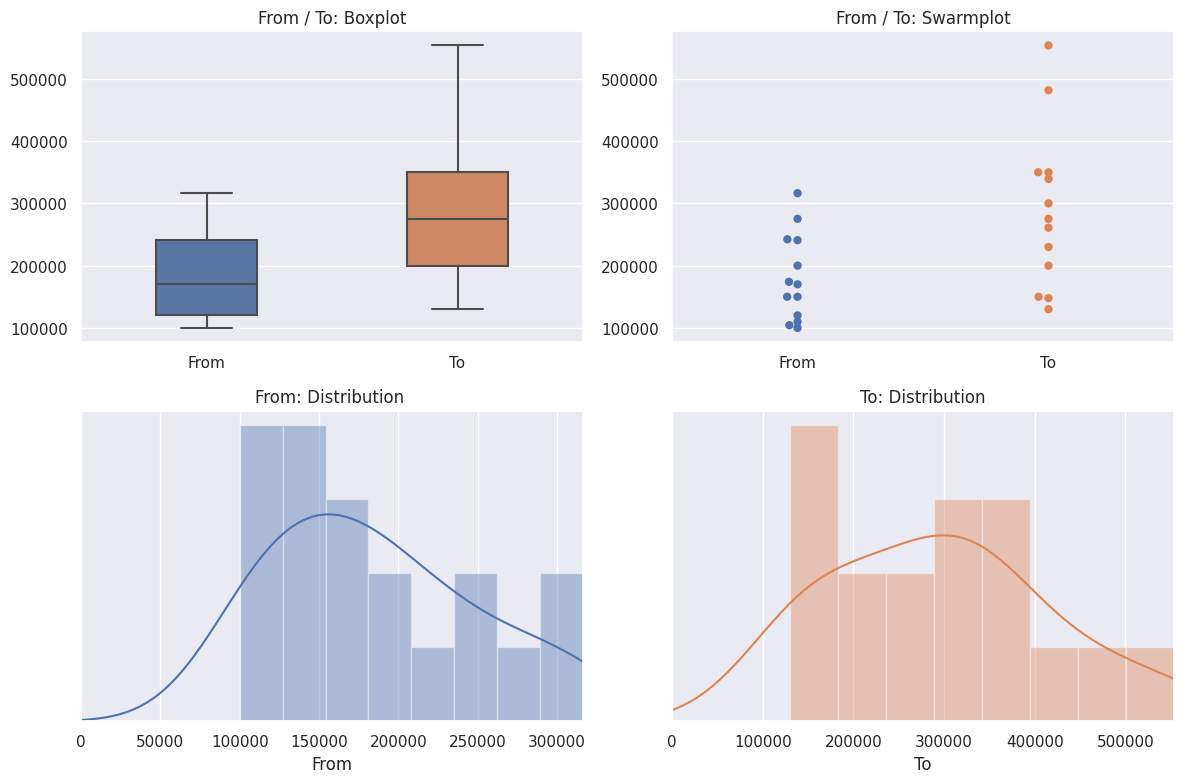

In [7]:
fz = plt.figure('Salary plots', figsize=(12, 8), dpi=100)

fz.add_subplot(2, 2, 1)
plt.title('From / To: Boxplot')
sns.boxplot(data=df[['From', 'To']].dropna(), width=0.4)

fz.add_subplot(2, 2, 2)
plt.title('From / To: Swarmplot')
sns.swarmplot(data=df[['From', 'To']].dropna(), size=6)

fz.add_subplot(2, 2, 3)
plt.title('From: Distribution ')
sns.histplot(df['From'].dropna(), bins=8, color='C0', kde=True)
plt.grid(True)
plt.xlim([0, df['From'].max()])
plt.yticks([], [])

fz.add_subplot(2, 2, 4)
plt.title('To: Distribution')
sns.histplot(df['To'].dropna(), bins=8, color='C1', kde=True)
plt.grid(True)
plt.xlim([0, df['To'].max()])
plt.yticks([], [])
plt.tight_layout()

### Зависимость зарплаты от опыта работы 

<Figure size 432x288 with 0 Axes>

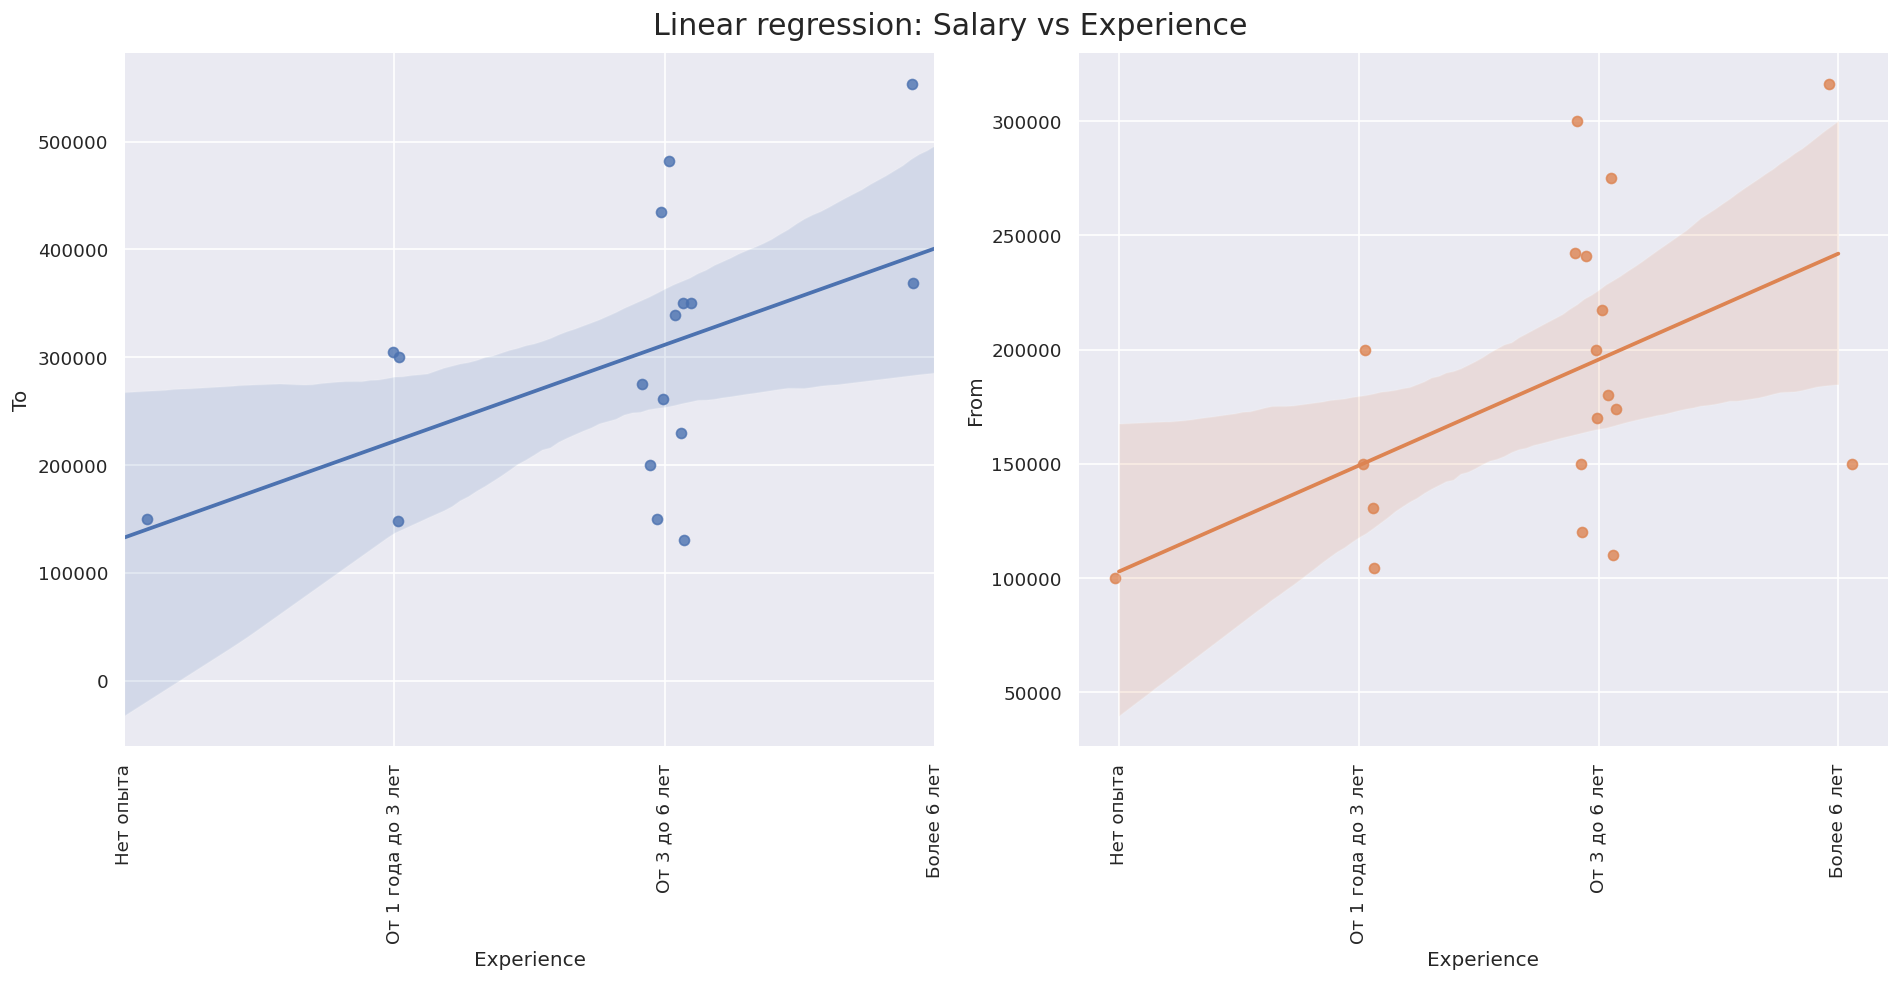

In [8]:
mapping = {'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 2, 'Более 6 лет': 3}
dummy_experience = df['Experience'].map(mapping)

plt.figure('Linear regression')
fig = plt.figure(figsize=(16, 8), dpi=120)
plt.suptitle('Linear regression: Salary vs Experience', y=1.02, fontsize=18)

fig.add_subplot(1, 2, 1)
sns.regplot(x=dummy_experience, y=df['To'], color="C0", x_jitter=.1)
plt.xticks(list(range(4)), labels=mapping.keys(), rotation='vertical')

fig.add_subplot(1, 2, 2)
sns.regplot(x=dummy_experience, y=df['From'], color="C1", x_jitter=.1)
plt.xticks(list(range(4)), labels=mapping.keys(), rotation='vertical')

plt.tight_layout()

### Усредненная статистика

Поскольку не у всех вакансий указаны поля "От" и "До", производится расчет средней зарплаты, а на основании этих данных рассчитывается статистика.

In [9]:
comb_from_to = np.nanmean(df[df['Salary']][['From', 'To']].to_numpy(), axis=1)
print('Average statistics (average filter for "From"-"To" parameters):')
print('Min    : %d' % np.min(comb_from_to))
print('Max    : %d' % np.max(comb_from_to))
print('Mean   : %d' % np.mean(comb_from_to))
print('Median : %d' % np.median(comb_from_to))

Average statistics (average filter for "From"-"To" parameters):
Min    : 120000
Max    : 435057
Mean   : 239038
Median : 217500


### Список часто используемых слов

В этом разделе производится поиск наиболее употребляемых слов для параметра **Ключевые навыки**. Результа функции - список в порядке убывания.

In [10]:
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['Keys'].to_list()
    
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        for el in keys_elem[1:-1].split(', '):
            if el != '':
                lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='Keys')

In [11]:
ds_keys = top_keys(df)

print(ds_keys[:15])

python                          134
sql                              95
data mining                      49
математическая статистика        24
английский язык                  19
ms sql                           17
linux                            15
hadoop                           15
анализ данных                    15
git                              13
data science                     13
статистический анализ            12
java                             12
математическое моделирование     12
big data                         11
Name: Keys, dtype: int64


### Описание вакансий

Поиск наиболее употребляемых слов для параметра **Описание вакансий**.  
Результат функции - список наиболее часто употребляемых слов (на английском языке) в порядке убывания.

In [12]:
def top_words(df):
    # Collect keys from dataframe
    words_df = df['Description'].to_list()
    # Long string - combine descriptions
    words_ls = ' '.join([re.sub(' +', ' ', re.sub('\d+', '', el.strip().lower())) for el in words_df])
    # Find all words
    words_re = re.findall('[a-zA-Z]+', words_ls)
    # Filter words with length < 3
    words_l2 = [el for el in words_re if len(el) > 2]
    # Unique words
    words_st = set(words_l2)
    # Remove 'stop words'
    stop_words = set(stopwords.words('english'))
    # XOR for dictionary
    words_st ^= stop_words
    # Dictionary - {Word: Counter}
    words_cnt = {el : words_l2.count(el) for el in words_st}
    # Pandas series
    return pd.Series(dict(sorted(words_cnt.items(), key=lambda x: x[1], reverse=True)))

In [13]:
ds_words = top_words(df)

print(ds_words.head(15))

data          505
python        273
sql           188
science       126
scientist     110
spark         107
quot          104
hadoop        101
learning       91
experience     88
pandas         83
numpy          79
team           69
tensorflow     60
nlp            59
dtype: int64


### Предсказание зарплаты

На этом этапе происходит предсказание зарплаты для вакансий, у которых она не указана. Ниже пошагово представлен алгоритм.
___

**Шаг 1: Предобработка данных**:
- Удаление NaN значений из таблицы,
- Поиск среднего значение для From / To столбцов,
- Замена столбцов зарплаты на усредненое значение

In [14]:
# Replace NaN from Salary into From / To fields,
# Find mean values for each elemen and drop NaNs
df_num = df[df['From'].notna() | df['From'].notna()]
df_avg = df_num[['From', 'To']].mean(axis=1)
df_num = df_num.drop(['Salary', 'From', 'To'], axis=1)
df_num.insert(3, 'Average', df_avg)

**Шаг 2: Подготовка модели**:
- Формирование вектора признаков из столбца ключевых навыков со списком исключений `stop_words`
- Поиск наиболее часто используемых слов в ключевых навыках
- One-Hot кодирование признаков таблицы
- Объединение в матрицу "объекты-признаки"

In [15]:
def text_replace(text) -> pd.Series:
    return text.str.lower().replace("[^a-zA-Z]\bqout\b|\bamp\b", " ", regex=True)

# Set TF-IDF features
min_df = 5 # ignore terms w/ frequency < than threshold
tf_idf = TfidfVectorizer(min_df=min_df, stop_words='english')

# Training set
X_train_text = tf_idf.fit_transform(text_replace(df_num['Keys']))
# Dict: {key: counter}
# print(pd.Series(tf_idf.vocabulary_)[:10])

# Print top words used in keys
idx = np.ravel(X_train_text.sum(axis=0).argsort(axis=1))[::-1][:7]
top_words = np.array(tf_idf.get_feature_names_out())[idx].tolist()
print('Top words used in keys: {}'. format(top_words))

# One-hot-encoding for data frame features
dct_enc = DictVectorizer()
X_train_cat = dct_enc.fit_transform(df_num[['Experience', 'Name']].to_dict('Records'))

# Stack vectors
X_train = hstack([X_train_text, X_train_cat])

Top words used in keys: ['python', 'data', 'sql']


**Шаг 3: Обучение модели**

In [16]:
# Train model
y_train = df_num['Average']
model = Ridge(alpha=1, random_state=255)
model.fit(X_train, y_train)

Ridge(alpha=1, random_state=255)

**Шаг 4: Применение к тестовым данным**

In [17]:
# Frame with NaNs
x_test = df[df['From'].isna() & df['To'].isna()]

# Test vectors
X_test_text = tf_idf.transform(text_replace(x_test['Description']))
X_test_cat = dct_enc.transform(x_test[['Experience', 'Name']].to_dict('Records'))
X_test = hstack([X_test_text, X_test_cat])

# Prediction model - result
y_test = model.predict(X_test)

print('Average salary for vacancies with NaN is {}'.format(y_test.mean(dtype=int)))

Average salary for vacancies with NaN is 219877


**Шаг 5: Замена отсутствующих зарплат на предсказанные значения**

In [18]:
df_tst = x_test.drop(['Salary', 'From', 'To'], axis=1)
df_tst.insert(3, 'Average', y_test.astype(int))
df_tst.head(10)

,Ids,Employer,Name,Average,Experience,Schedule,Keys,Description
5,40117400,Билайн,Data Scientist,196144,От 1 года до 3 лет,Полный день,"['Python', 'Data Mining', 'Java', 'Git', 'SCAL...",Наша команда каждый день работает над повышени...
6,40012491,ФГУП ГосНИИАС,Data Scientist (Computer Vision) - Junior,145117,Нет опыта,Гибкий график,"['Python', 'ML', 'Pytorch', 'Computer Vision']",Ведущий индустриальный центр по развитию и вне...
8,39713985,Mail.ru Group,Data Scientist,168177,От 1 года до 3 лет,Полный день,"['Python', 'Linux', 'SQL']",MY.GAMES — международный игровой бренд (входит...
9,40046412,Айтаргет,Data Scientist (AiData.me product),225712,От 1 года до 3 лет,Полный день,"['Data Mining', 'Python', 'Математическая стат...",Мы ищем в команду aidata.me (DMP платформа для...
11,39597321,Mail.ru Group,Data Scientist (Predictive Analytic Solutions),234071,От 3 до 6 лет,Гибкий график,"['Python', 'Data Mining', 'Mathematical Analys...",Команда направления Big Data и Predictive Anal...
13,40138097,Константа Сервисез,Аналитик данных/Data scientist,188726,От 1 года до 3 лет,Полный день,"['SQL', 'Python', 'Transact-SQL', 'PostgreSQL']",Сфера деятельности Мы занимаемся проектами по ...
14,40061077,ОКБ,Data Scientist,168177,От 1 года до 3 лет,Полный день,"['Python', 'SQL', 'Управление рисками', 'Анали...","Обязанности: Поведенческие модели PD, LGD, EA..."
15,40143339,Лига Цифровой Экономики,Data Scientists,226866,От 1 года до 3 лет,Полный день,"['Data Mining', 'SQL', 'Python', 'MATLAB', 'Ма...",Проект направлен на создание продуктивных моде...
16,40137655,Неофлекс,Data Scientist/ Аналитик данных,148903,От 1 года до 3 лет,Полный день,"['Python', 'Финансовое моделирование', 'Управл...",О компании Неофлекс - ведущий поставщик програ...
17,39444384,«Газпромбанк» (Акционерное общество),Data Scientist,243420,От 3 до 6 лет,Удаленная работа,"['Python', 'SQL', 'Oracle Pl/SQL', 'Sas', 'MS ...",В Департаменте анализа и моделирования данных ...


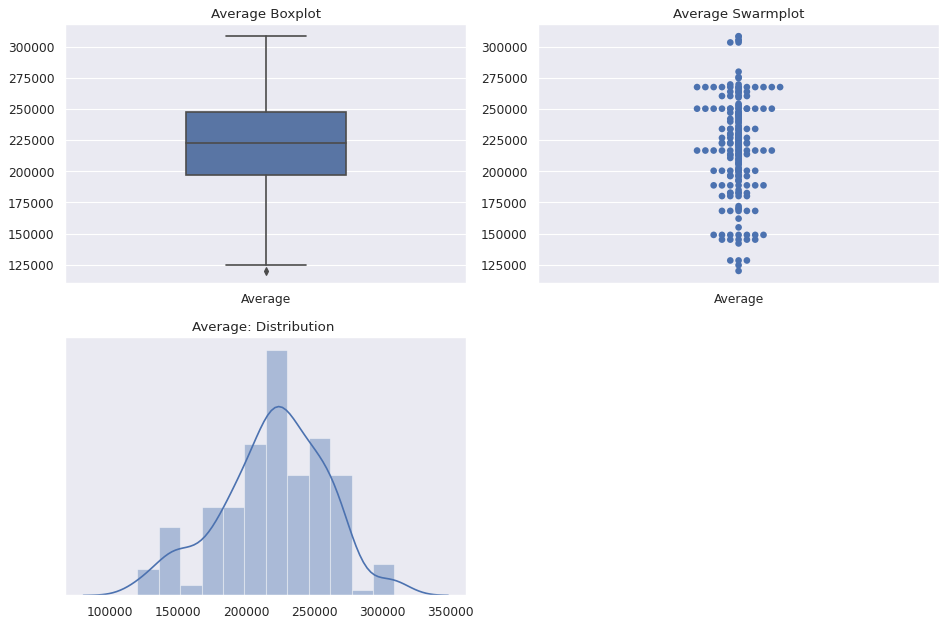

In [19]:
fp = plt.figure('Predicted salaries', figsize=(12, 8), dpi=80)
fp.add_subplot(2, 2, 1)
plt.title('Average Boxplot')
sns.boxplot(data=df_tst[['Average']], width=0.4)

fp.add_subplot(2, 2, 2)
plt.title('Average Swarmplot')
sns.swarmplot(data=df_tst[['Average']].dropna(), size=6)

fp.add_subplot(2, 2, 3)
plt.title('Average: Distribution ')
sns.histplot(df_tst[['Average']].dropna(), bins=12)
plt.grid(False)
plt.yticks([], [])
plt.tight_layout()